<a href="https://colab.research.google.com/github/Eshwari16/Deep_Learning/blob/main/Practical5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
#for visual aesthetics
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
#to display matplotlib plots directly in the notebook.
%matplotlib inline
#used for tokenizing text into sentences and words
from nltk.tokenize import sent_tokenize, word_tokenize
#used for topic modeling and word embeddings.
import gensim
#Word2Vec is used for training word embeddings.
from gensim.models import Word2Vec
 #used for regular expressions and text pattern matching.
import re
#beautiful soup used for web scraping and parsing HTML content.
import bs4 as bs
#used for making HTTP requests and fetching data from the web.
import urllib.request
#for natural language processing and text analysis
import nltk

In [4]:
#downloads the Punkt tokenizer models. The Punkt tokenizer is used for tokenizing text into sentences and words.
nltk.download('punkt')

#downloads a list of common stopwords. Words having little value in text analysis.
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# to make request from specified url
scrapped_data=urllib.request.urlopen("https://www.toppr.com/guides/essays/essay-on-my-self/")

# reads content from specified url
article=scrapped_data.read()

# to parse the HTML content from article variable. lxml specifies parser to be used for parsing.
parsed_article=bs.BeautifulSoup(article,'lxml')

# finds and extracts all the HTML <p> elements (paragraphs) from the parsed HTML content
paragraphs=parsed_article.find_all('p')

# empty string is intialized
article_text=""

for p in paragraphs:
  article_text+=p.text                  #the text content of each paragraph is extracted using p.text, and it is appended to the article_text string
sentences=article_text

In [6]:
print(article_text)

Seven billion people are on this Earth, and everybody is different from the rest of others. There is nothing without purpose in this world. Everything has some purpose. Humans are the best creation, and each person is exclusive. Thus, writing about myself, I’m here to express myself that what I see, what I experience and what I plan for my life. I try myself to be modest, passionate, devoted, hardworking and honest.I’m from a middle-class family of Bihar, I am Naresh Shukla. Nobody comes in this world, without the support of family and friends. Actually, whatever you will be, it is just because of your family. My father is a respectable businessman in our community.My mother is a doctor. They both love their occupation. That’s I have learned from my parents the value of time, honesty, hard work and commitment to the purpose.We are three brothers and sisters. Being the eldest I am the most liable from my brothers and sisters. I am wanted to guide and take care of my other siblings. We a

In [7]:
# remove special characters
sentences = re.sub('[^A-Za-z]+', ' ', sentences) #sub used for replcaing substring A-Z a-z

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip() #removes any trailing space

# lower all characters
sentences = sentences.lower()

all_sent=nltk.sent_tokenize(sentences)
all_words=[nltk.word_tokenize(sent) for sent in all_sent]

from nltk.corpus import stopwords

for i in range(len(all_words)):

  # Within each iteration of the loop, a list comprehension is used to filter out stopwords from the current list at index i.
  # The stopwords.words('english') function from NLTK is used to obtain a list of common English stopwords,
  # and it filters out any word w in the current list that is also in the list of stopwords.
  # This filtered list is then assigned back to all_words[i], effectively removing stopwords from the list.

  all_words[i]=[w for w in all_words[i] if w not in stopwords.words('english')]
data =all_words
data1=data[0] #assigns the first element (list) from the modified data to the variable data1

In [8]:
model1 = gensim.models.Word2Vec(data, min_count = 1,vector_size = 52, window = 5)

instance is created = gensim.models.Word2Vec
mincount =  all words, even those occurring just once, will be included in the vocabulary and used for training.
window = model will consider the five words before and five words after the current word in the training data
vector size = determines the dimensionality of the word vectors

In [9]:
vocabulary = model1.wv.index_to_key # retrieve a list of words that the Word2Vec model has learned word embeddings for.
print(vocabulary)


['good', 'try', 'best', 'always', 'school', 'class', 'life', 'one', 'without', 'aim', 'person', 'man', 'like', 'every', 'family', 'doctor', 'love', 'time', 'history', 'parents', 'world', 'purpose', 'people', 'goals', 'right', 'express', 'books', 'friends', 'believe', 'happy', 'career', 'whatever', 'speak', 'weaknesses', 'keen', 'different', 'nobody', 'brothers', 'stories', 'ambition', 'reading', 'also', 'honest', 'sisters', 'besides', 'effect', 'shall', 'thing', 'know', 'things', 'football', 'take', 'everybody', 'interest', 'read', 'architecture', 'refer', 'strong', 'indian', 'classical', 'appwhich', 'rich', 'civilization', 'part', 'feel', 'th', 'presently', 'city', 'studying', 'ideasi', 'topics', 'essay', 'list', 'huge', 'get', 'lasting', 'long', 'grandmother', 'listen', 'used', 'novels', 'pre', 'india', 'ancient', 'childhood', 'work', 'reader', 'writing', 'bihar', 'middle', 'hardworking', 'devoted', 'passionate', 'modest', 'plan', 'experience', 'see', 'thus', 'passion', 'exclusive', 

In [10]:
wrd='mother'
#wrd=['subset','machine', 'learning','closely','related']
v1=model1.wv[wrd]
similar_words=model1.wv.most_similar(wrd) #list of similar words is retrieved iterated and printed
for x in similar_words:
  print(x)

('mistake', 0.3532971143722534)
('good', 0.3421582281589508)
('avidly', 0.33001360297203064)
('world', 0.2759200930595398)
('advised', 0.2751327455043793)
('thus', 0.27250000834465027)
('whatever', 0.2366577535867691)
('commitment', 0.23593682050704956)
('liable', 0.23197758197784424)
('admit', 0.22162282466888428)


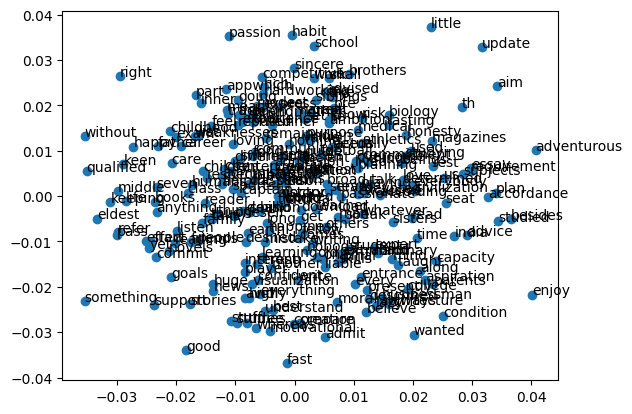

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Extract word vectors from the Word2Vec model
X = model1.wv.vectors

# Initialize a PCA model with 2 components (2D visualization)
pca = PCA(n_components=2)

# Apply PCA to reduce the dimensionality of word vectors
result = pca.fit_transform(X)

# Create a scatter plot of the word embeddings in 2D
pyplot.scatter(result[:, 0], result[:, 1])

# Get the list of words from the Word2Vec model
words = model1.wv.index_to_key

# Annotate the scatter plot with word labels
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

# Show the scatter plot
pyplot.show()